In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

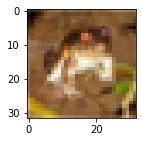

In [9]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
def plot_sample(x,y,index):
    plt.figure(figsize= (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

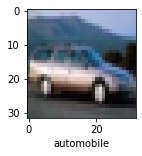

In [26]:
plot_sample(x_train,y_train,4)

# Normalize our Data

In [15]:
x_train = x_train/255
x_test = x_test/255

# first we will build ANN 

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = "relu"),
    layers.Dense(1000,activation = "relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(optimizer= "SGD",
           loss = "sparse_categorical_crossentropy",
           metrics = ["accuracy"])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.8104 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6191 - accuracy: 0.4306
Epoch 3/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5373 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4794 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4313 - accuracy: 0.4948


In [18]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.4848 - accuracy: 0.4730


[1.4848383665084839, 0.4729999899864197]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification Report : \n", classification_report(y_test,y_pred_classes))

classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.32      0.44      1000
           1       0.69      0.50      0.58      1000
           2       0.29      0.50      0.37      1000
           3       0.32      0.37      0.35      1000
           4       0.55      0.28      0.37      1000
           5       0.40      0.38      0.39      1000
           6       0.44      0.67      0.53      1000
           7       0.66      0.42      0.51      1000
           8       0.55      0.69      0.61      1000
           9       0.53      0.61      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



# Cnn 

In [37]:
Cnn = models.Sequential([
    #cnn layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])


In [40]:
cnn.compile(optimizer="adam",
           loss='sparse_categorical_crossentropy',
           metrics=["accuracy"])

In [41]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.4927 - accuracy: 0.4598
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1365 - accuracy: 0.6034
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0069 - accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9246 - accuracy: 0.68080s - los
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8600 - accuracy: 0.7012
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8058 - accuracy: 0.7205
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7596 - accuracy: 0.7363
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7208 - accuracy: 0.7486
Epoch 9/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.6842 - accuracy: 0.76141s - los - ETA: 0s - los
Epoch 10/10
1563/1563 [=========

In [42]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9039 - accuracy: 0.7032


[0.9038803577423096, 0.7031999826431274]

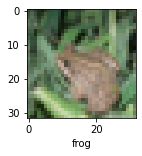

In [45]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,4)

# prediction

In [43]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.29184971e-05, 5.03201761e-07, 8.62496090e-04, 9.86924410e-01,
        1.84435812e-05, 7.92752393e-03, 1.26755491e-04, 1.36638846e-07,
        4.11422504e-03, 2.63651327e-06],
       [1.93440972e-03, 2.32379258e-01, 1.90030296e-05, 1.12047751e-07,
        2.41160308e-07, 1.57116162e-07, 1.03122755e-09, 3.43539995e-07,
        7.65227914e-01, 4.38628020e-04],
       [7.20910728e-02, 1.02401823e-01, 3.14412103e-03, 1.16060264e-02,
        3.46082449e-03, 1.56443880e-03, 1.03226674e-04, 6.83354971e-04,
        7.84895420e-01, 2.00496726e-02],
       [8.68783712e-01, 2.66639097e-03, 1.63295977e-02, 1.68065599e-03,
        2.18027290e-02, 5.75253443e-06, 2.35542338e-05, 5.95999381e-06,
        8.84179324e-02, 2.83804809e-04],
       [3.60555646e-07, 7.30186948e-05, 3.04353479e-02, 2.29585573e-01,
        4.05611098e-01, 3.82555686e-02, 2.95634806e-01, 1.82929347e-04,
        2.20085596e-04, 1.31252273e-06]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 4, 6, 5, 6, 3, 1]

In [50]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

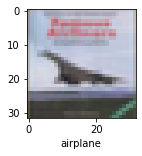

In [51]:
plot_sample(x_test,y_test,3)

In [52]:
print("classification report : \n",classification_report(y_test,y_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1000
           1       0.80      0.83      0.81      1000
           2       0.64      0.58      0.61      1000
           3       0.49      0.58      0.53      1000
           4       0.66      0.64      0.65      1000
           5       0.57      0.65      0.61      1000
           6       0.84      0.71      0.77      1000
           7       0.70      0.78      0.73      1000
           8       0.85      0.77      0.81      1000
           9       0.79      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000

